<h1> TD : Utilisation de Pandas</h1>
<h2>Analyse du jeu de données : "Parcours et réussite des bachelières et bacheliers inscrits pour la première fois en licence" </h2>
<div>
<p>Ce jeu de données a été obtenu à la page suivante :<br>
<a href="https://www.data.gouv.fr/datasets/parcours-et-reussite-des-bachelieres-et-bacheliers-inscrits-pour-la-premiere-fois-en-licence-donnees-consolidees/" target = "_blank">https://www.data.gouv.fr/datasets/parcours-et-reussite-des-bachelieres-et-bacheliers-inscrits-pour-la-premiere-fois-en-licence-donnees-consolidees/</a>
</p>
</div>

<hr>
<h2 style="color:#6422C7; line-height: 40px; font-weight: bold;"> Travail préliminaire </h2>

<h3 style="color:#2232C7; line-height: 35px; font-weight: bold;"> Importation du TP4 </h3>

<div class="alert alert-block alert-warning">
On commence par importer le travail de la séance précédente.
</div>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

df_eleves = pd.read_csv('fr-esr-parcours-et-reussite-des-bacheliers-en-licence.csv', sep = ';')

def make_dict(col1, col2):
    return df_eleves[[col1, col2]].drop_duplicates().set_index(col1).to_dict()[col2]

gd_disc_dict = make_dict('Id Grande discipline', 'Grande discipline')
disc_dict = make_dict('Id Discipline', 'Discipline')
sect_disc_dict = make_dict('Id Secteur disciplinaire', 'Secteur disciplinaire')
serie_dict = make_dict('Id Série ou type de Bac', 'Série ou type de Bac')
age_dict = make_dict('Id Âge au bac', 'Âge au bac')
sexe_dict = make_dict('Id Sexe', 'Sexe')
mention_dict = make_dict('Id Mention au Bac', 'Mention au Bac')
df_eleves.drop(columns = ['Année de cohorte des données sur la réussite en licence',
                          'Effectif de néobacheliers de la cohorte.1',
                          'Obtention de la licence en 3 ans',
                          'Obtention de la licence en 4 ans',
                          'Obtention de la licence en 3 ou 4 ans',
                          'Grande discipline',
                          'Discipline',
                          'Secteur disciplinaire',
                          'Série ou type de Bac',
                          'Série ou type de Bac',
                          'Sexe',
                          'Mention au Bac',
                          'Année de cohorte des données sur le passage entre L1 et L2'],
               inplace = True)
df_eleves.fillna(0.0, inplace = True)
df_eleves.drop(df_eleves[df_eleves['Id Secteur disciplinaire'] == 7].index, inplace = True)

statistiques_par_mention = df_eleves.groupby('Id Mention au Bac')[['Effectif de néobacheliers de la cohorte',
                                              'Passage en L2 en 1 an', 
                                              'Redoublement en L1', 
                                              'Passage en L2 en 2 ans']].sum()
df_passage = df_eleves.pivot_table(index = 'Id Grande discipline',
                                   columns = 'Id Série ou type de Bac',
                                   values = 'Passage en L2 en 1 ou 2 ans',
                                   aggfunc = 'sum')
df_neobacheliers = df_eleves.pivot_table(index = 'Id Grande discipline',
                                         columns = 'Id Série ou type de Bac',
                                         values = 'Effectif de néobacheliers de la cohorte',
                                         aggfunc = 'sum')
df_statistiques_par_filiere = df_passage/df_neobacheliers
df_statistiques_par_filiere.rename(index = gd_disc_dict, inplace = True)
df_statistiques_par_filiere.rename(columns = serie_dict, inplace = True)

## TD Matplotlib

### Échauffement

<div class="alert alert-info">
    Créez un graphique en camembert qui montre la répartition des mentions des étudiant·e·s néobacheli·er·ère·s.
</div>

### Relation entre filière au Bac et validation de la L1

<div class="alert alert-info">
    On aimerait maintenant visualiser les taux de validation de la L1. Pour cela, Pour cela, créez un graphique en barre où sont représentées ces valeurs.. Pour chaque filière de Bac, affichez quatre barres (une pour chaque filière universitaire). Ajoutez une légende ainsi que les libellés des filières du bac.<br><br>
    Réutilisez "statistiques_par_filiere" de la section précédente.<br><br>
    La légende doit utiliser les intitulés complets des grandes disciplines.
</div>

<div class="alert alert-danger">
    Attention, ici, nous ne nous intéressons qu'à la visualisation des valeurs, et non à leur interprétation. Comprendre pourquoi on trouve de telles valeurs relève de la sociologie, et sort du cadre de ce cours. Si ces questions vous intéressent, voici quelques suggestions de lecture : 
    <ul>
        <li>Bourdieu, Pierre, et Monique de Saint Martin. « Agrégation et ségrégation ». Actes de la Recherche en Sciences Sociales 69, nᵒ 1 (1987): 2‑50. https://doi.org/10.3406/arss.1987.2380.</li>
        <li>Couto, Marie-Paule, Fanny Bugeja-Bloch, et Leïla Frouillou. « Parcoursup : les prémices d’un accroissement de la stratification sociale et scolaire des formations du supérieur ». Sciences de l’éducation. Agora débats/jeunesses 89, nᵒ 3 (2021): 23‑38. https://doi.org/10.3917/agora.089.0023.</li>
        <li> Sur un ton plus léger : Rivière Tiphaine. La distinction: librement inspiré du livre de Pierre Bourdieu. Avec Bourdieu Pierre. La Découverte-Delcourt. La Découverte Delcourt, 2023.</li>
    </ul>
</div>


## Relation entre sexe et validation de L1 par filière.

On va maintenant regarder la relation entre le sexe des étudiant·e·s et la validation de la L1.

<div class="alert alert-info">
    Reproduisez l'image ci-dessous. Commencez par créer les dataframes contenant les données dont vous avez besoin, puis créez l'image.
</div>

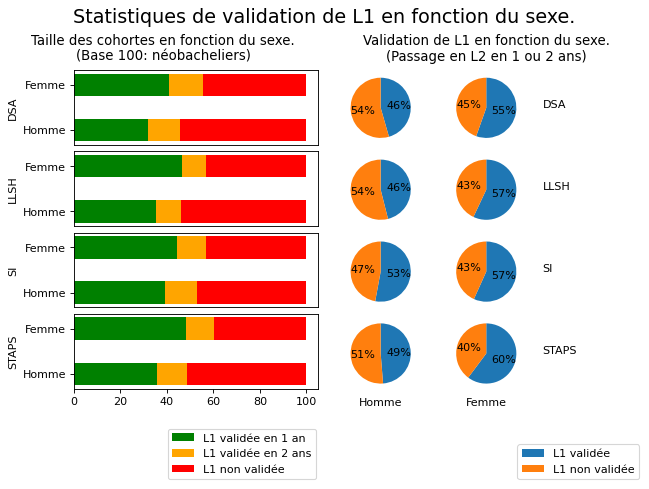

<div class="alert alert-block alert-warning">
Dans un premier temps, travaillez avec Pandas pour obtenir les statistiques nécessaires.
</div>

<div class="alert alert-block alert-warning">
Puis, travaillez avec Matplotlib pour obtenir l'image voulue.
</div>